This is my Jupyter notebook for the Week 2-3 mini project for Astro 503 at the University of North Carolina at Chapel Hill. 

In this notebook, I will be looking at data from the RESOLVE and ECO galaxy surveys.

In [15]:
# standard imports and naming conventions; uncomment as needed
import numpy as np              # basic numerical analysis
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats     # statistical functions
from astroML.plotting import scatter_contour

%matplotlib inline

Next I will retrieve my data from the ECO DR1 database.

My SQL querry was:
select name, cz, logmstar, modelu_rcorr, r90, morphel, grpcz, fc, logmh, den1mpc , absrmag

I saved the results to a file named mini_ECO.csv, which I will now read in below.

In [16]:
data = np.genfromtxt("mini_ECO.csv", delimiter=",", dtype=None, names=True) # better than np.loadtxt if have column names
data.dtype.names

('NAME',
 'CZ',
 'LOGMSTAR',
 'MODELU_RCORR',
 'R90',
 'MORPHEL',
 'GRPCZ',
 'FC',
 'LOGMH',
 'DEN1MPC',
 'ABSRMAG')

Next we will peel off Early and Late morphology galaxies into two data sets

In [17]:
mass = data['LOGMSTAR']
urColor = data['MODELU_RCORR']

sel = np.where((urColor > -99) & (mass > 0) & (mass > 9.))

data = data[sel]

lateIndex = np.where(data['MORPHEL']=='L')
data = data[lateIndex]

mass = data['LOGMSTAR']
density = data['DEN1MPC']
urColor = data['MODELU_RCORR']
radius = data['R90']
groupV = data['GRPCZ']
mag = data['ABSRMAG']

blueIndex = np.where((urColor > 0.0) & (urColor<=2.0))
redIndex = np.where((urColor>2.0) & (urColor<=4.0))

blueMass = mass[blueIndex]
blueDensity = density[blueIndex]
blueColor = urColor[blueIndex]
blueRadius = radius[blueIndex]
blueV = groupV[blueIndex]
blueMag = mag[blueIndex]

redMass = mass[redIndex]
redDensity = density[redIndex]
redColor = urColor[redIndex]
redRadius = radius[redIndex]
redV = groupV[redIndex]
redMag = mag[redIndex]

Now we just need to plot some thigs.

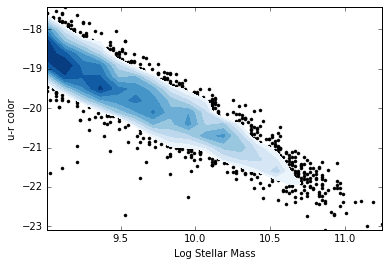

In [18]:
fig1, axcolormstar = plt.subplots()
axcolormstar = plt.axes()
#axcolormstar.plot(lateMass,lateColor,'g.')
scatter_contour(blueMass, blueMag, threshold=20, log_counts=True, ax=axcolormstar,
                histogram2d_args=dict(bins=20),
                plot_args=dict(marker='.', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.Blues))
axcolormstar.set_xlabel("Log Stellar Mass")
axcolormstar.set_ylabel("u-r color")
#axcolormstar.plot([10.5,10.5],[min(urcolor),max(urcolor)])

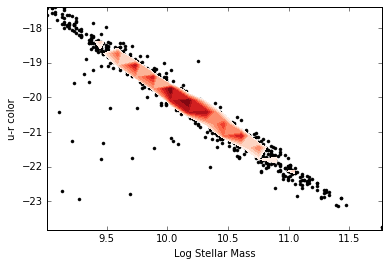

In [19]:
fig2, axcolormstar = plt.subplots()
axcolormstar = plt.axes()
#axcolormstar.plot(logmstar,urcolor,'g.')
scatter_contour(redMass, redMag, threshold=20, log_counts=True, ax=axcolormstar,
                histogram2d_args=dict(bins=20),
                plot_args=dict(marker='.', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.Reds))
axcolormstar.set_xlabel("Log Stellar Mass")
axcolormstar.set_ylabel("u-r color")
#axcolormstar.plot([10.5,10.5],[min(urcolor),max(urcolor)])

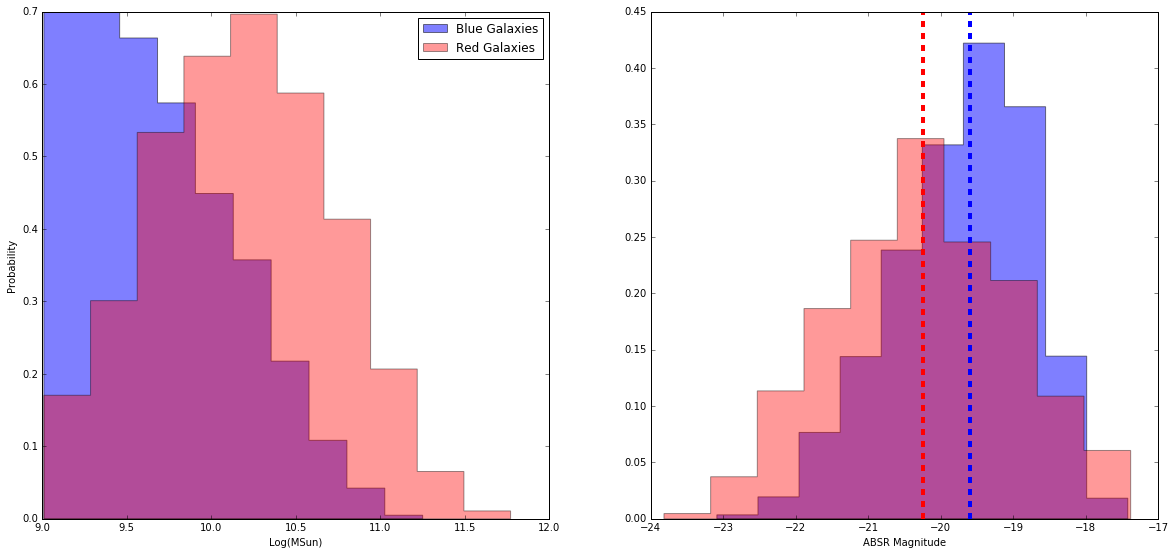

In [81]:
redMagMedian = np.median(redMag)
blueMagMedian = np.median(blueMag)

fig3 = plt.figure(figsize=(20, 20))
#fig3.subplots_adjust(left=0.11, right=0.95, wspace=0.3, bottom=0.17, top=1.5)

ax = fig3.add_subplot(221)
ax.hist(blueMass, histtype='stepfilled', fc= 'blue', alpha=0.5, label = 'Blue Galaxies', normed=1)
ax.legend(loc=1)
#ax.set_title('Masses of Late Morphology Red and Blue Galaxies')
ax.set_ylabel('Probability')
ax.set_xlabel('Log(MSun)')


ax = fig3.add_subplot(221)
ax.hist(redMass, histtype='stepfilled', fc='red', alpha=0.4, label = 'Red Galaxies', normed=1)
ax.legend(loc=1)


ax = fig3.add_subplot(222)
ax.hist(blueMag, histtype='stepfilled', fc= 'blue', alpha=0.5, normed=1)
ax.set_xlabel('ABSR Magnitude')
ax.axvline(x=blueMagMedian, linewidth = 4, color='blue', linestyle = 'dashed')


ax = fig3.add_subplot(222)
ax.hist(redMag, histtype='stepfilled', fc='red', alpha=0.4, normed=1)
ax.axvline(x=redMagMedian, linewidth = 4, color='red', linestyle = 'dashed')
